## 12.5 Lab: Unsupervised Learning

In [11]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [27]:
from sklearn.cluster import \
(KMeans ,AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,cut_tree)
from ISLP.cluster import compute_linkage

## 12.5.1 Principal Components Analysis

In [28]:
from ISLP import load_data

USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [29]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [30]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [31]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [32]:
scaler = StandardScaler(with_std=True ,
with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [33]:
pcaUS = PCA()

In [34]:
pcaUS.fit(USArrests_scaled)

PCA()

In [35]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [36]:
scores = pcaUS.transform(USArrests_scaled)

In [37]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

Text(0.5434320914456825, -0.16731863540174585, 'Rape')

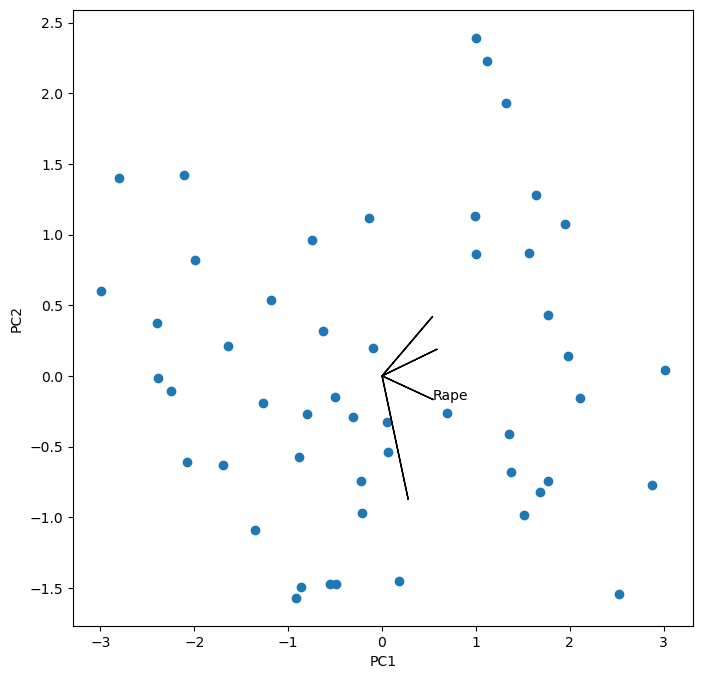

In [38]:
i, j = 0, 1 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape [1]):ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
ax.text(pcaUS.components_[i,k],
pcaUS.components_[j,k],
USArrests.columns[k])

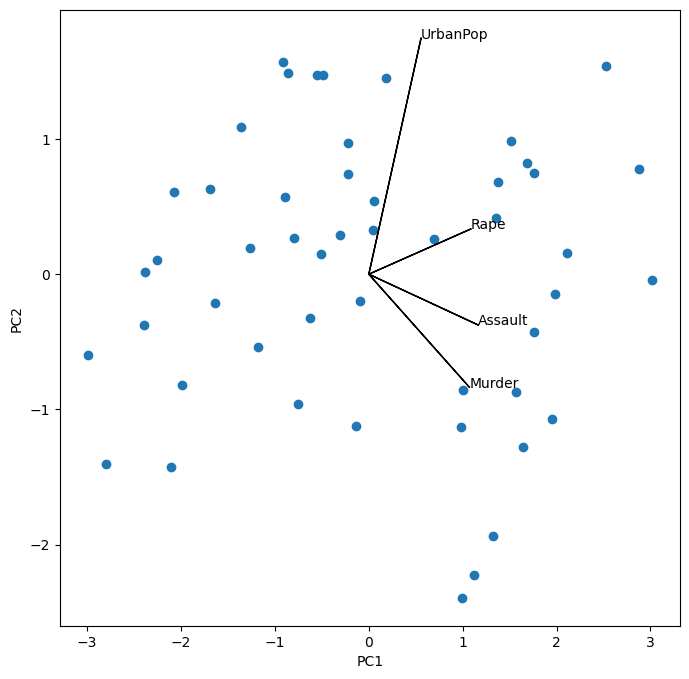

In [40]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_ [1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape [1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k],s_*pcaUS.components_[j,k],USArrests.columns[k])

In [41]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [42]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [43]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [44]:
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks ,pcaUS.explained_variance_ratio_ ,marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim ([0,1])
ax.set_xticks(ticks)

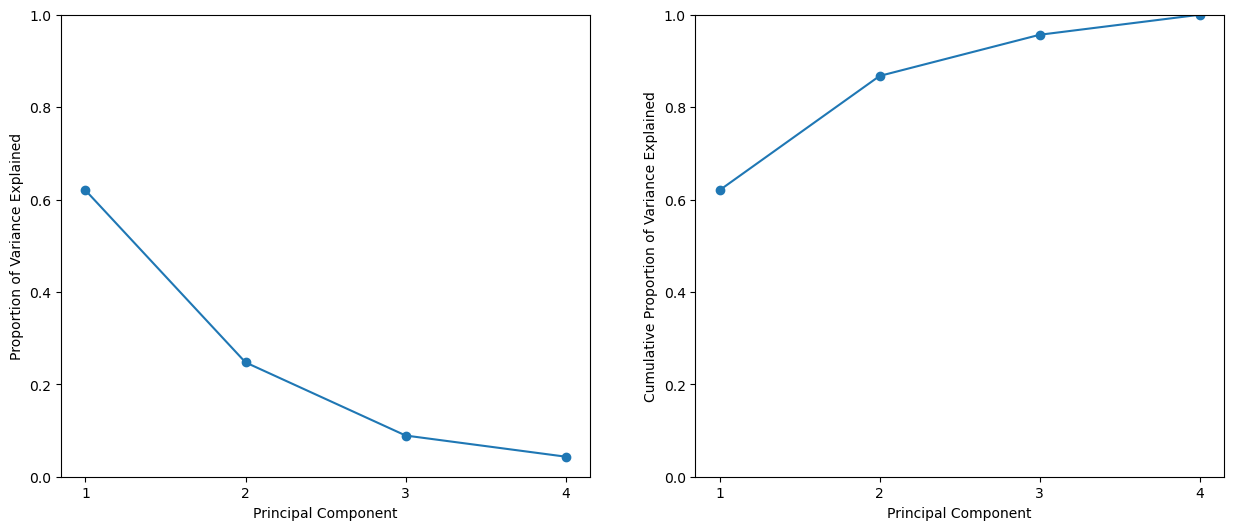

In [45]:
ax = axes[1]
ax.plot(ticks ,
pcaUS.explained_variance_ratio_.cumsum(),
marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [46]:
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

## 12.5.2 Matrix Completion

In [47]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape , D.shape , V.shape

((50, 4), (4,), (4, 4))

In [48]:
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [49]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [50]:
(U * D[None ,:])[:3]

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [51]:
scores [:3]

array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

In [52]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape [0]),
n_omit ,
replace=False)
c_idx = np.random.choice(np.arange(X.shape [1]),
n_omit ,
replace=True)
Xna = X.copy()
Xna[r_idx , c_idx] = np.nan

In [54]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None ,:M]
    return L.dot(V[:M])

In [55]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat , axis=0)
Xhat[r_idx , c_idx] = Xbar[c_idx]

In [56]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss ]**2)
mss0 = np.mean(Xna[~ismiss ]**2)

In [58]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat , M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
print("Iteration: {0}, MSS :{1:.3f}, Rel.Err {2:.2e}"
      .format(count , mss , rel_err))

Iteration: 9, MSS :0.381, Rel.Err 2.95e-08


In [59]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.711356743429736

## 12.5.3 Clustering
## K-Means Clustering

In [60]:
np.random.seed(0);
X = np.random.standard_normal ((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

In [61]:
kmeans = KMeans(n_clusters=2,
random_state=2,
n_init =20).fit(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

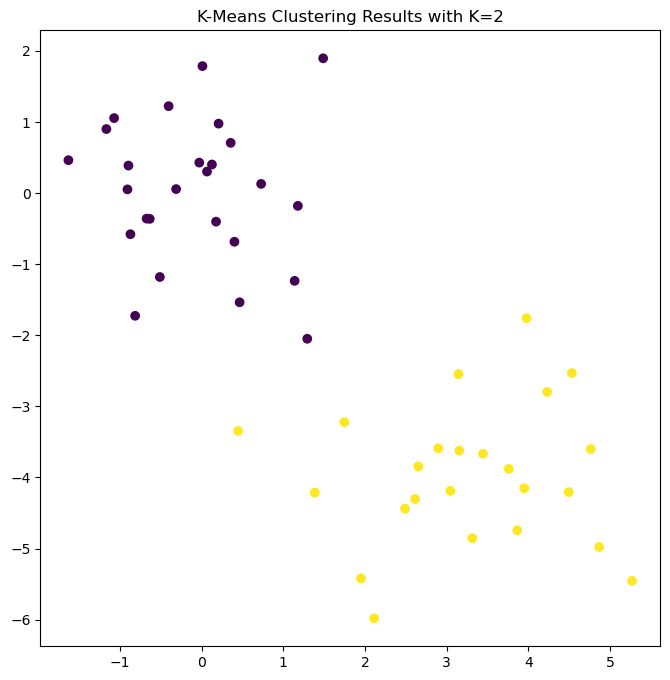

In [63]:
fig , ax = plt.subplots(1, 1, figsize =(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


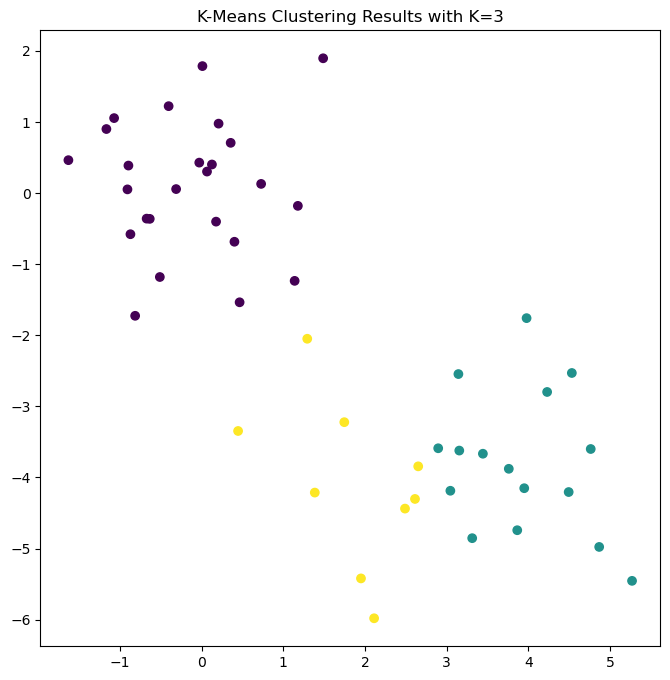

In [64]:
kmeans = KMeans(n_clusters=3,
random_state=3,
n_init =20).fit(X)
fig , ax = plt.subplots(figsize =(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [65]:
kmeans1 = KMeans(n_clusters=3,
random_state=3,
n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
random_state=3,
n_init =20).fit(X);
kmeans1.inertia_ , kmeans20.inertia_

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(78.06117325882116, 75.03508259100438)

## Hierarchical Clustering

In [66]:
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
n_clusters=None ,
linkage='complete')
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [67]:
hc_avg = HClust(distance_threshold=0,
n_clusters=None ,
linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0,
n_clusters=None ,
linkage='single');
hc_sing.fit(X);

In [69]:
D = np.zeros((X.shape[0], X.shape [0]));
for i in range(X.shape [0]):
    x_ = np.multiply.outer(np.ones(X.shape [0]), X[i])
    D[i] = np.sqrt(np.sum((X - x_)**2, 1));
hc_sing_pre = HClust(distance_threshold=0,
n_clusters=None ,
metric='precomputed',
linkage='single')
hc_sing_pre.fit(D)

AgglomerativeClustering(distance_threshold=0, linkage='single',
                        metric='precomputed', n_clusters=None)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [115.0, 115.0, 146.25, 146.25],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [182.5, 182.5, 212.5, 212.5],
  [130.625, 130.625, 197.5, 197.5],
  [100.0, 100.0, 164.0625, 164.0625],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [365.0, 365.0, 375.0, 375.0],
  [350.0, 350.0, 370.0, 370.0],
  [335.0, 335.0, 360.0, 360.0],
  [312.5, 312.5, 3

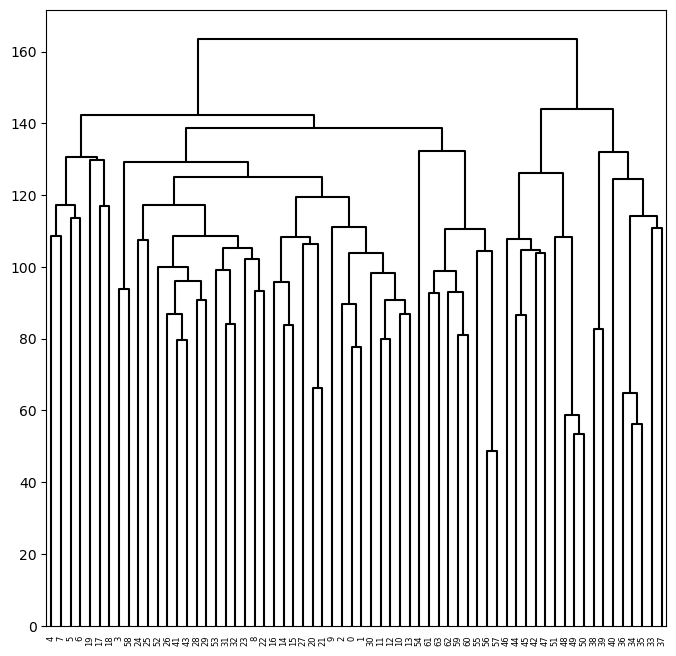

In [114]:
# Strip the spaces from keys
cargs = {'color_threshold': -np.inf, 'above_threshold_color': 'black'}

# Or more defensively (in case you're editing from elsewhere)
cargs = {k.strip(): v for k, v in {
    'color_threshold ':-np.inf,
    'above_threshold_color ':'black'
}.items()}

linkage_comp = compute_linkage(hc_comp)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs)

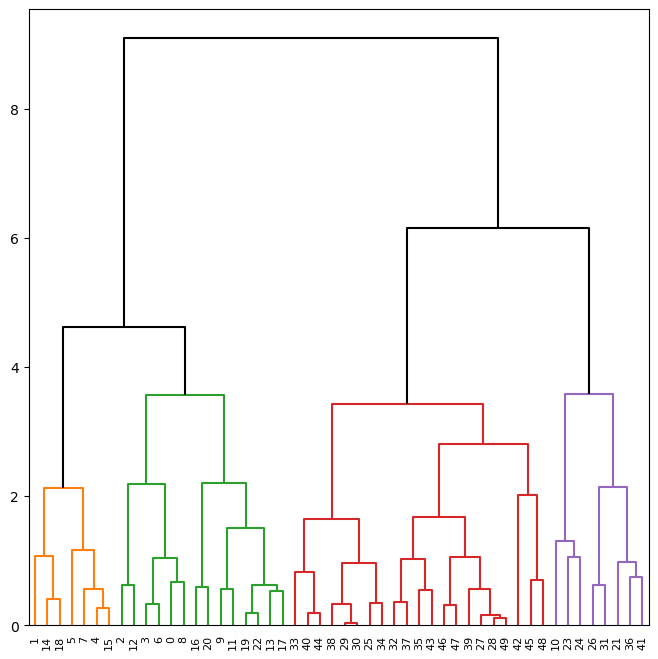

In [71]:
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp ,ax=ax,color_threshold=4,above_threshold_color='black');

In [72]:
cut_tree(linkage_comp , n_clusters =4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [73]:
cut_tree(linkage_comp , height=5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

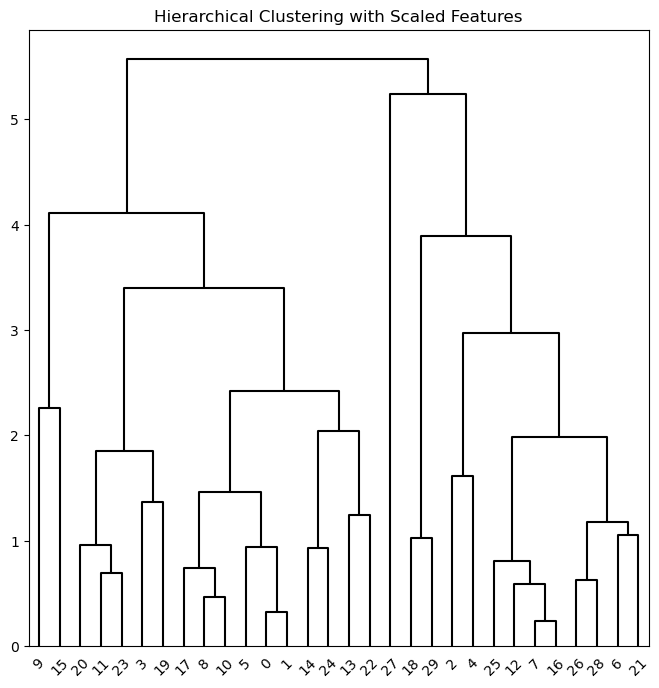

In [111]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0,n_clusters=None ,linkage='complete').fit(X_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale , ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");

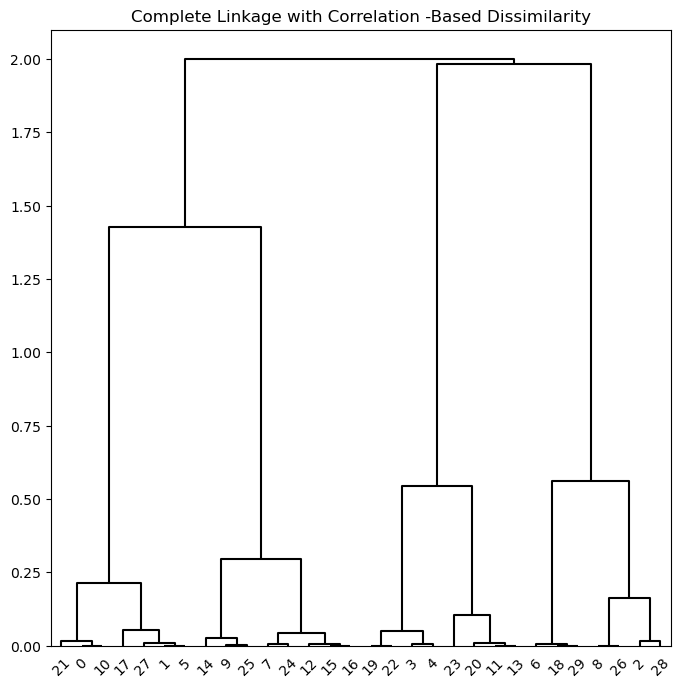

In [110]:
X = np.random.standard_normal ((30, 3))
corD = 1 - np.corrcoef(X)
hc_cor = HClust(linkage='complete',
distance_threshold=0,n_clusters=None ,metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation -Based Dissimilarity");

## 12.5.4 NCI60 Data Example

In [80]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']

In [81]:
nci_data.shape

(64, 6830)

In [82]:
nci_labs.value_counts()

label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

## PCA on the NCI60 Data

In [83]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)

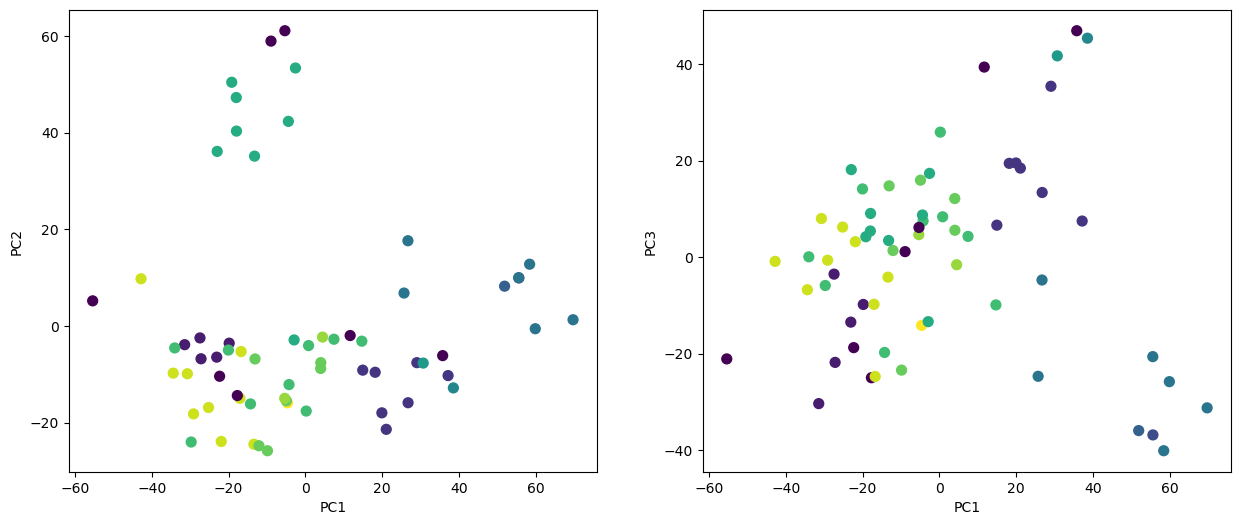

In [84]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab)
for lab in nci_labs.values])
fig , axes = plt.subplots(1, 2, figsize =(15,6))
ax = axes[0]
ax.scatter(nci_scores[:,0],
nci_scores[:,1],
c=nci_groups ,
marker='o',
s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
ax = axes[1]
ax.scatter(nci_scores[:,0],
nci_scores[:,2],
c=nci_groups ,
marker='o',
s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');

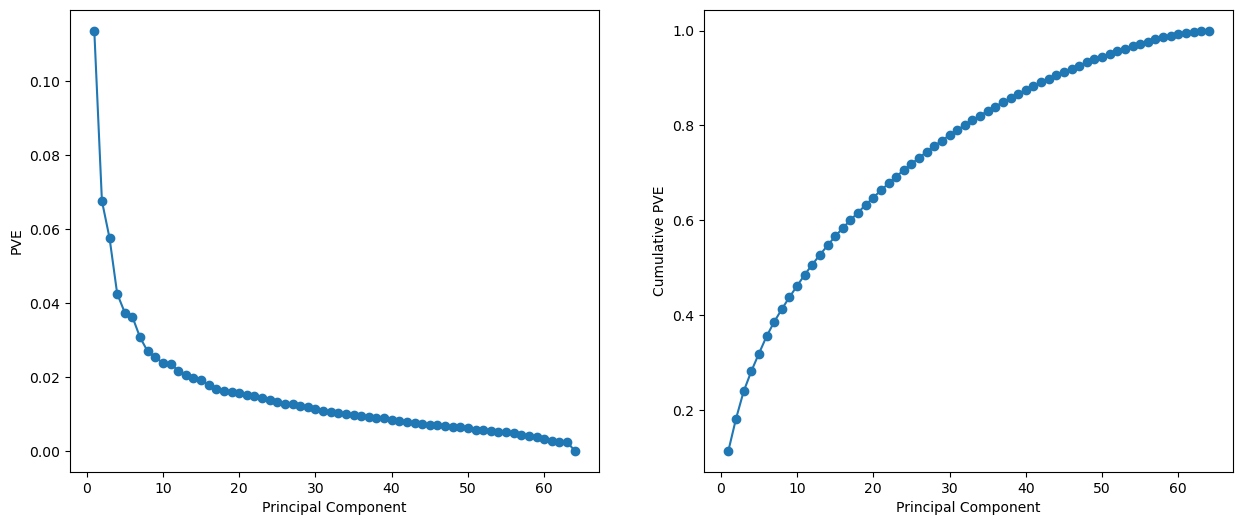

In [90]:
fig , axes = plt.subplots(1, 2, figsize =(15,6))
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks ,
nci_pca.explained_variance_ratio_ ,
marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks ,
nci_pca.explained_variance_ratio_.cumsum(),
marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

## Clustering the Observations of the NCI60 Data

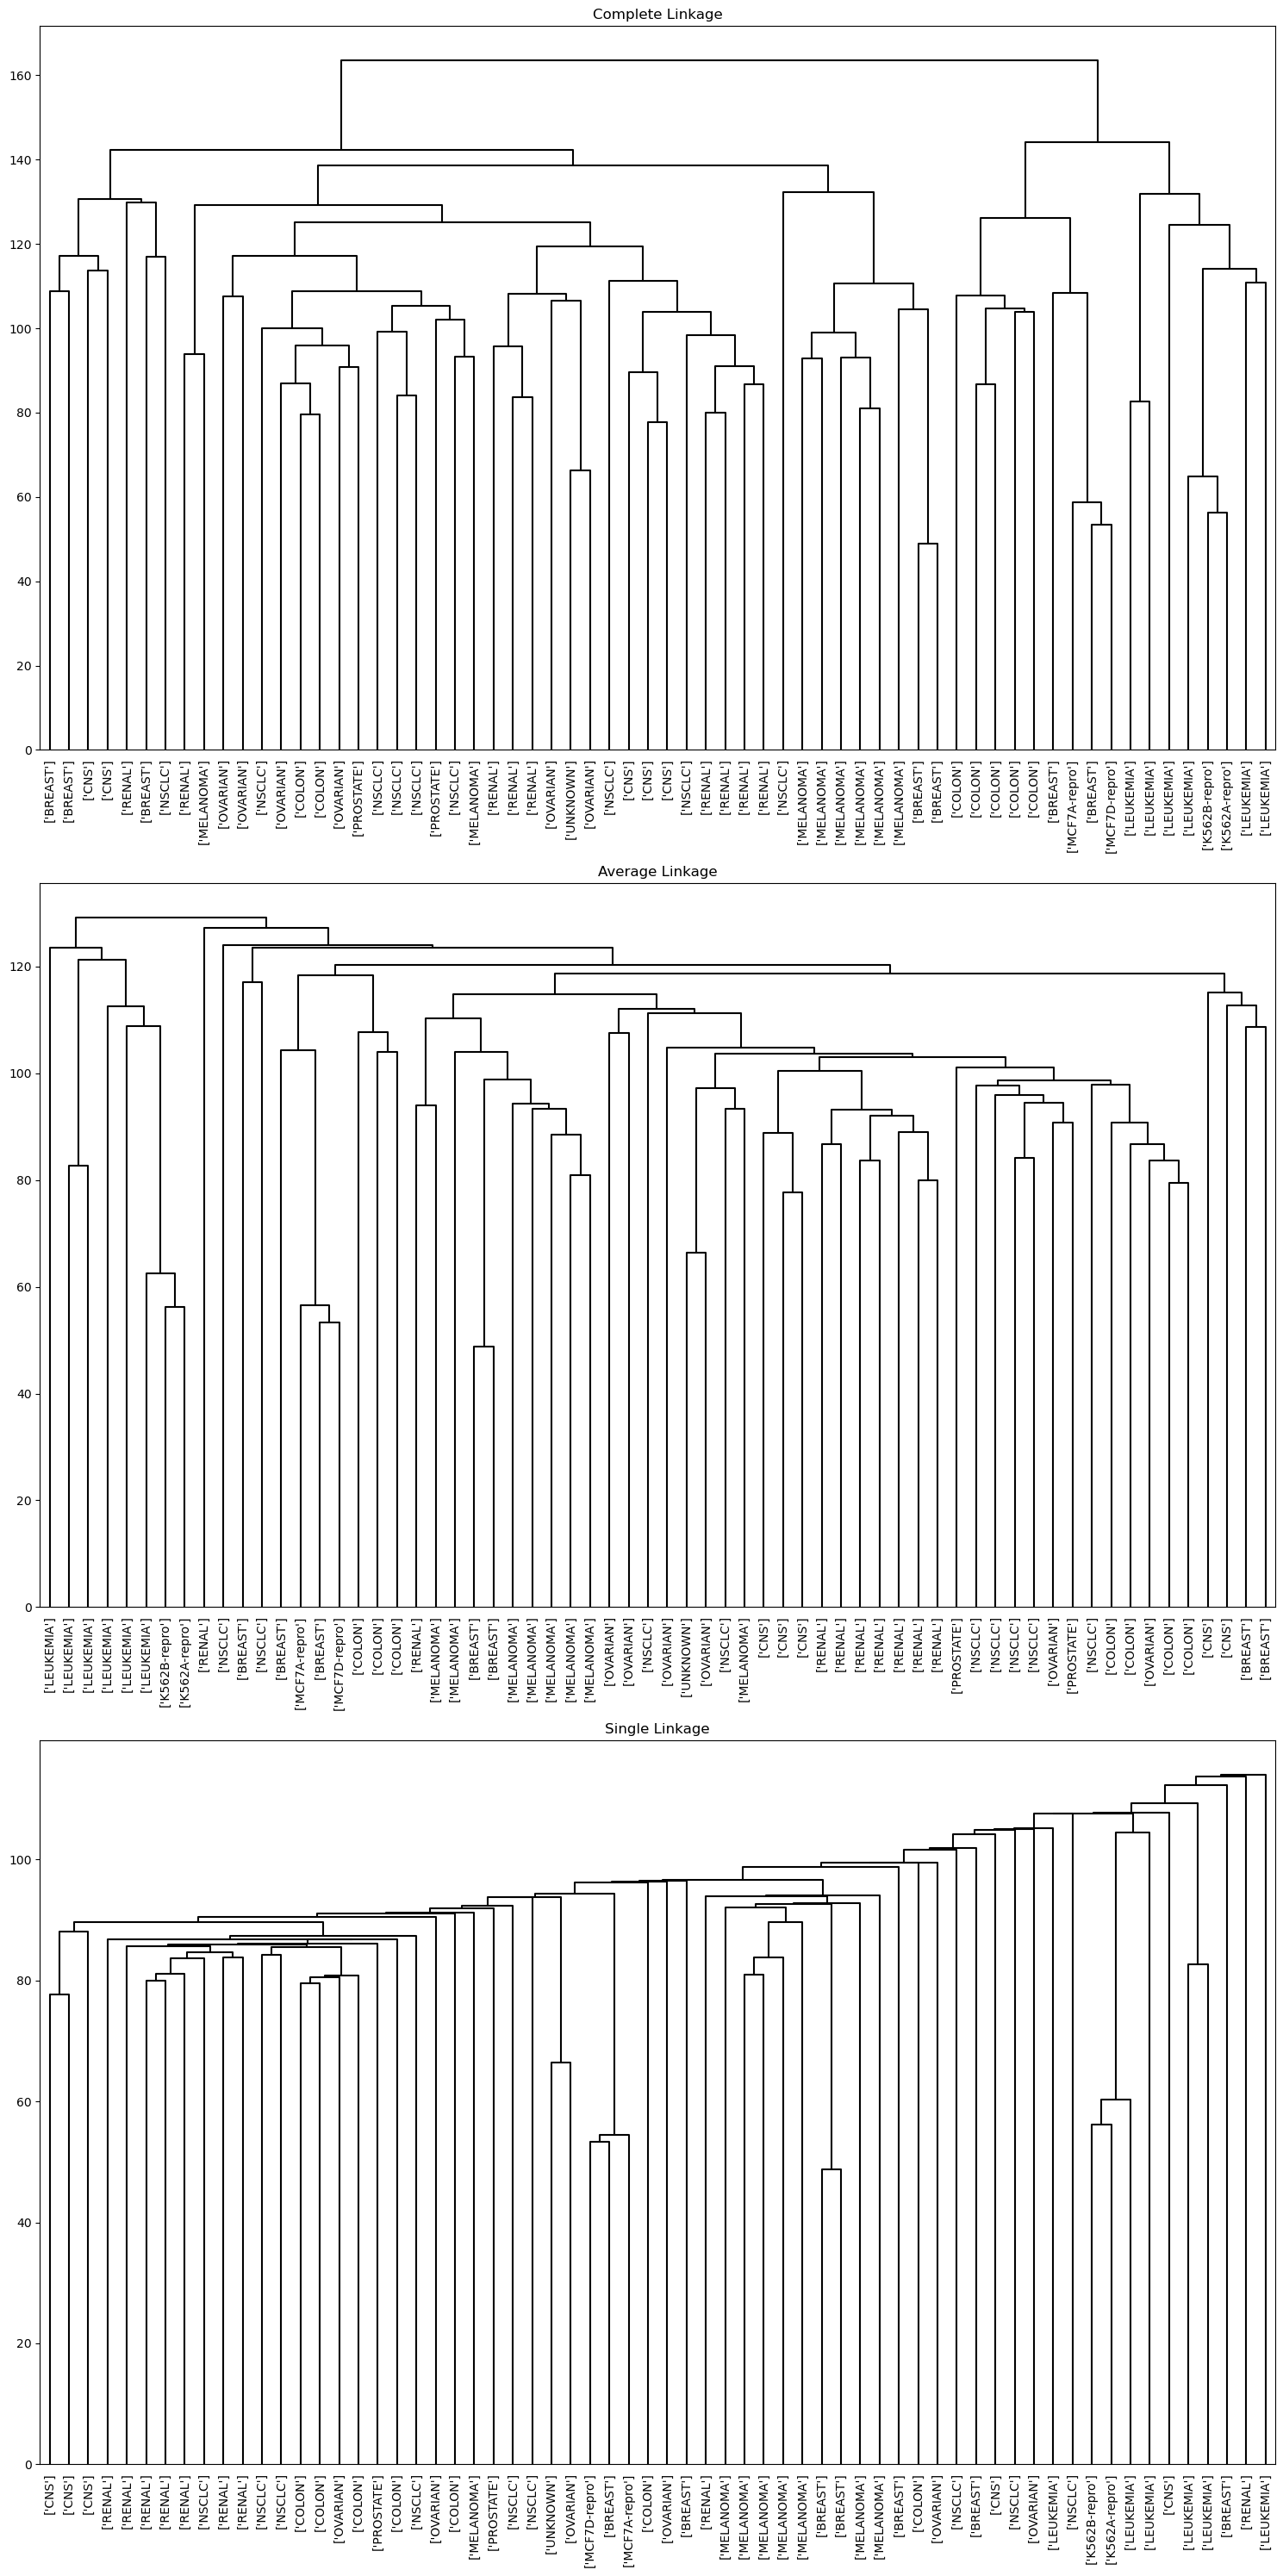

In [103]:
def plot_nci(linkage, ax, cut=-np.inf):
    # ★ Corrected keyword names (no trailing spaces)
    cargs = {
        'above_threshold_color': 'black',
        'color_threshold': cut
    }

    hc = HClust(
        n_clusters=None,
        distance_threshold=0,
        linkage=linkage.lower()
    ).fit(nci_scaled)

    linkage_ = compute_linkage(hc)

    dendrogram(
        linkage_,
        ax=ax,
        labels=np.asarray(nci_labs),
        leaf_font_size=10,
        **cargs
    )
    ax.set_title(f'{linkage} Linkage')
    return hc


# ── Plot the three linkage methods ─────────────────────────────
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

hc_comp = plot_nci('Complete', axes[0])
hc_avg  = plot_nci('Average',  axes[1])
hc_sing = plot_nci('Single',   axes[2])

plt.tight_layout()


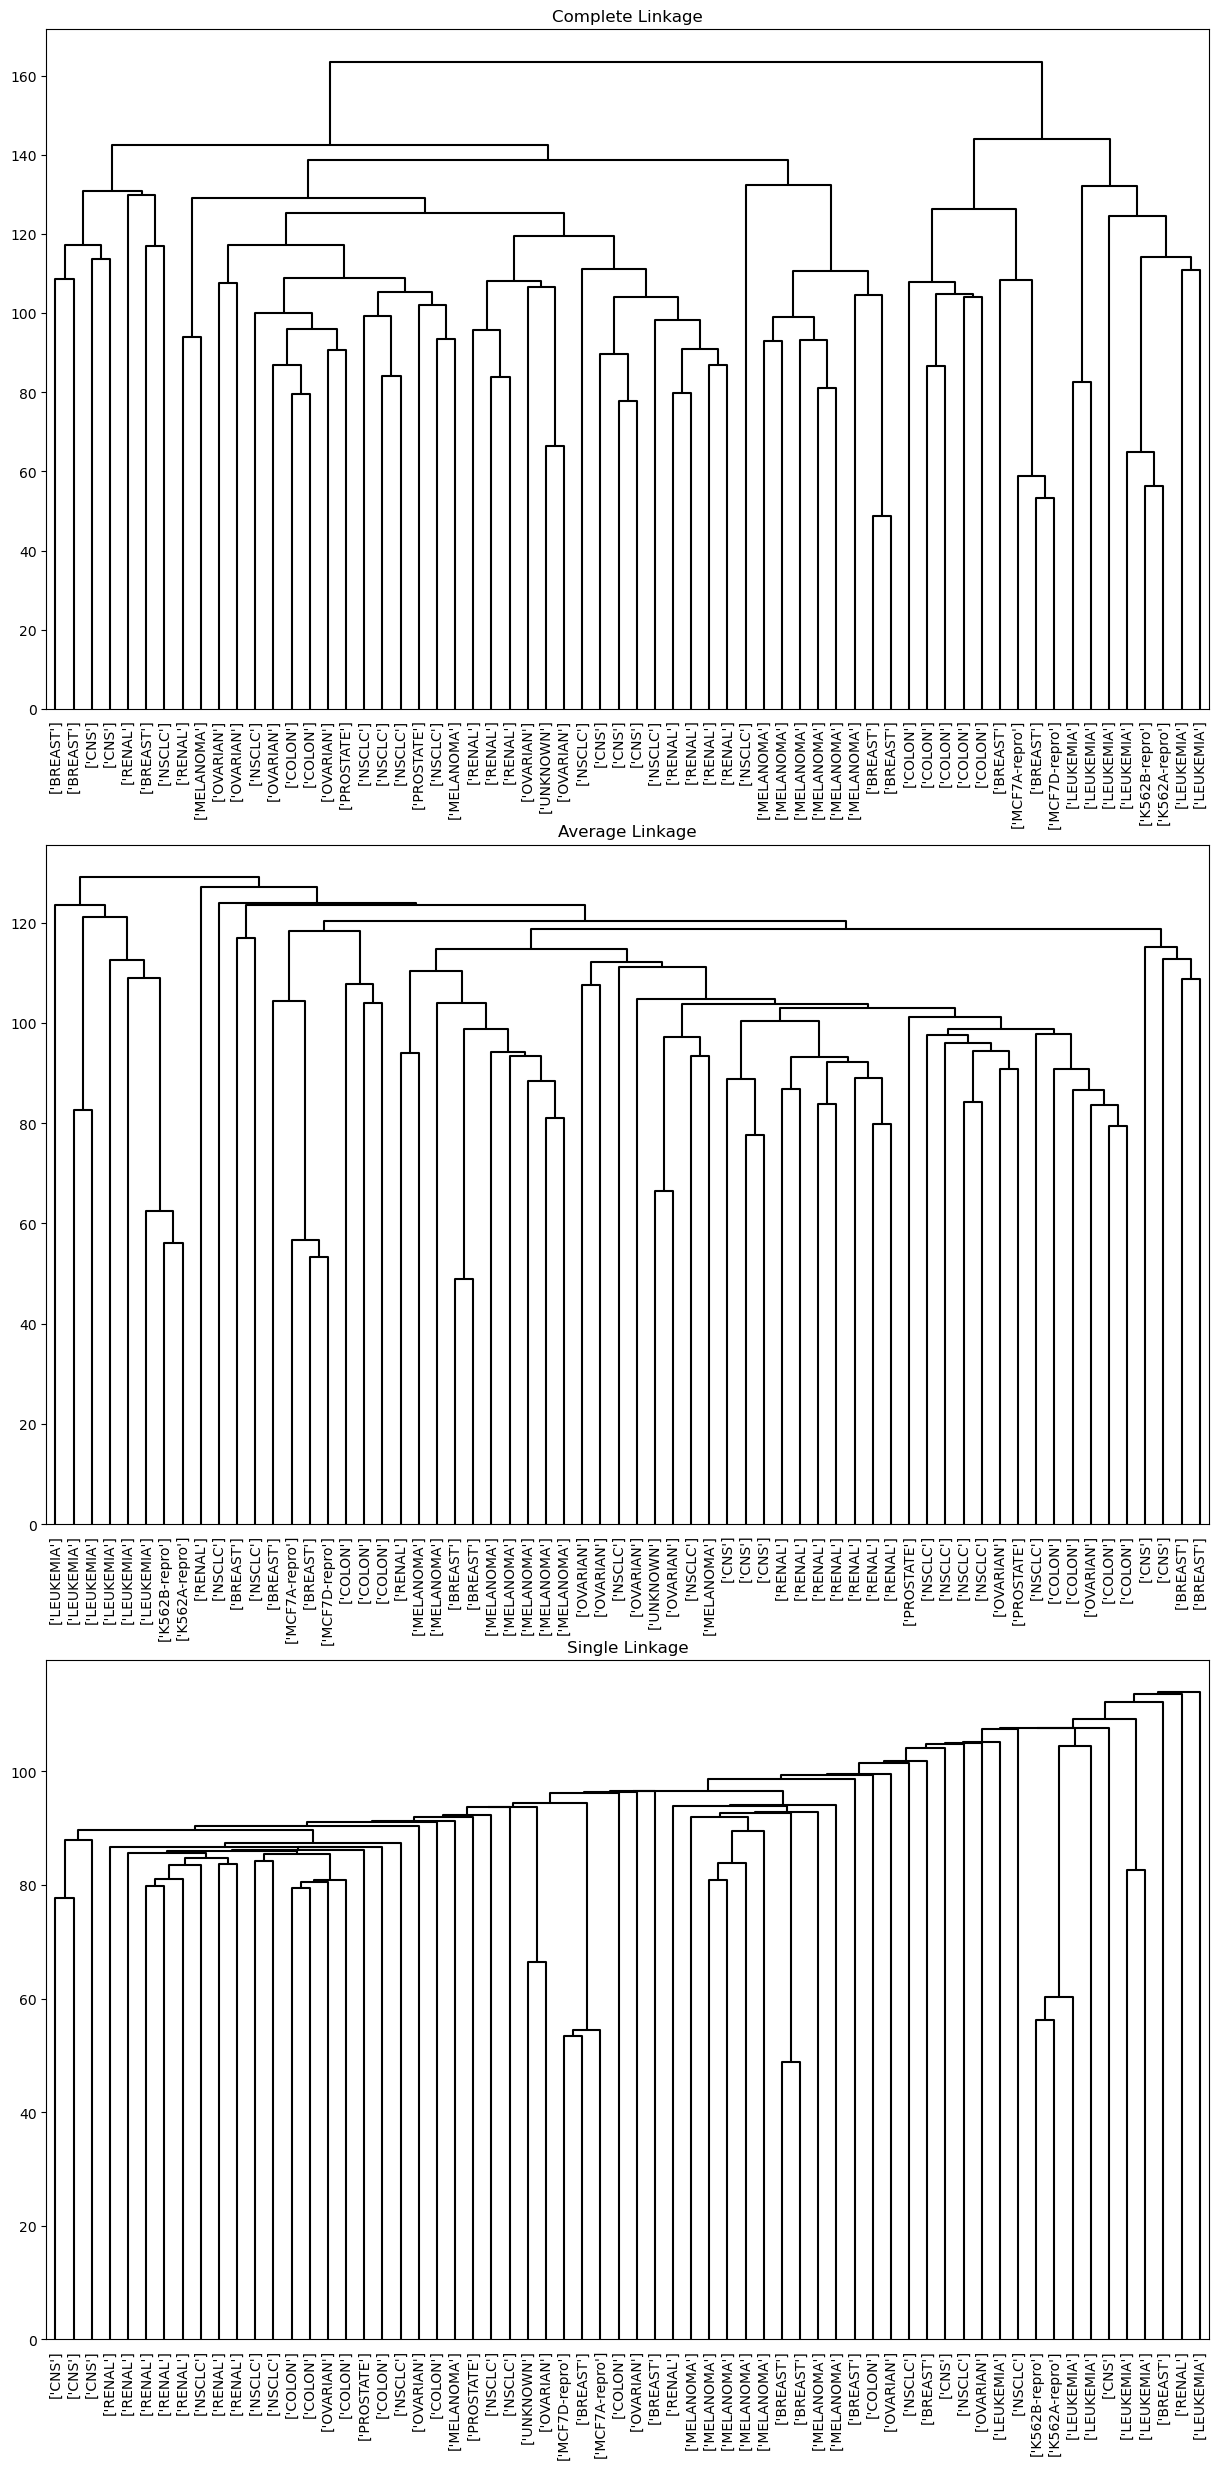

In [104]:
fig , axes = plt.subplots(3, 1, figsize =(15,30))
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)

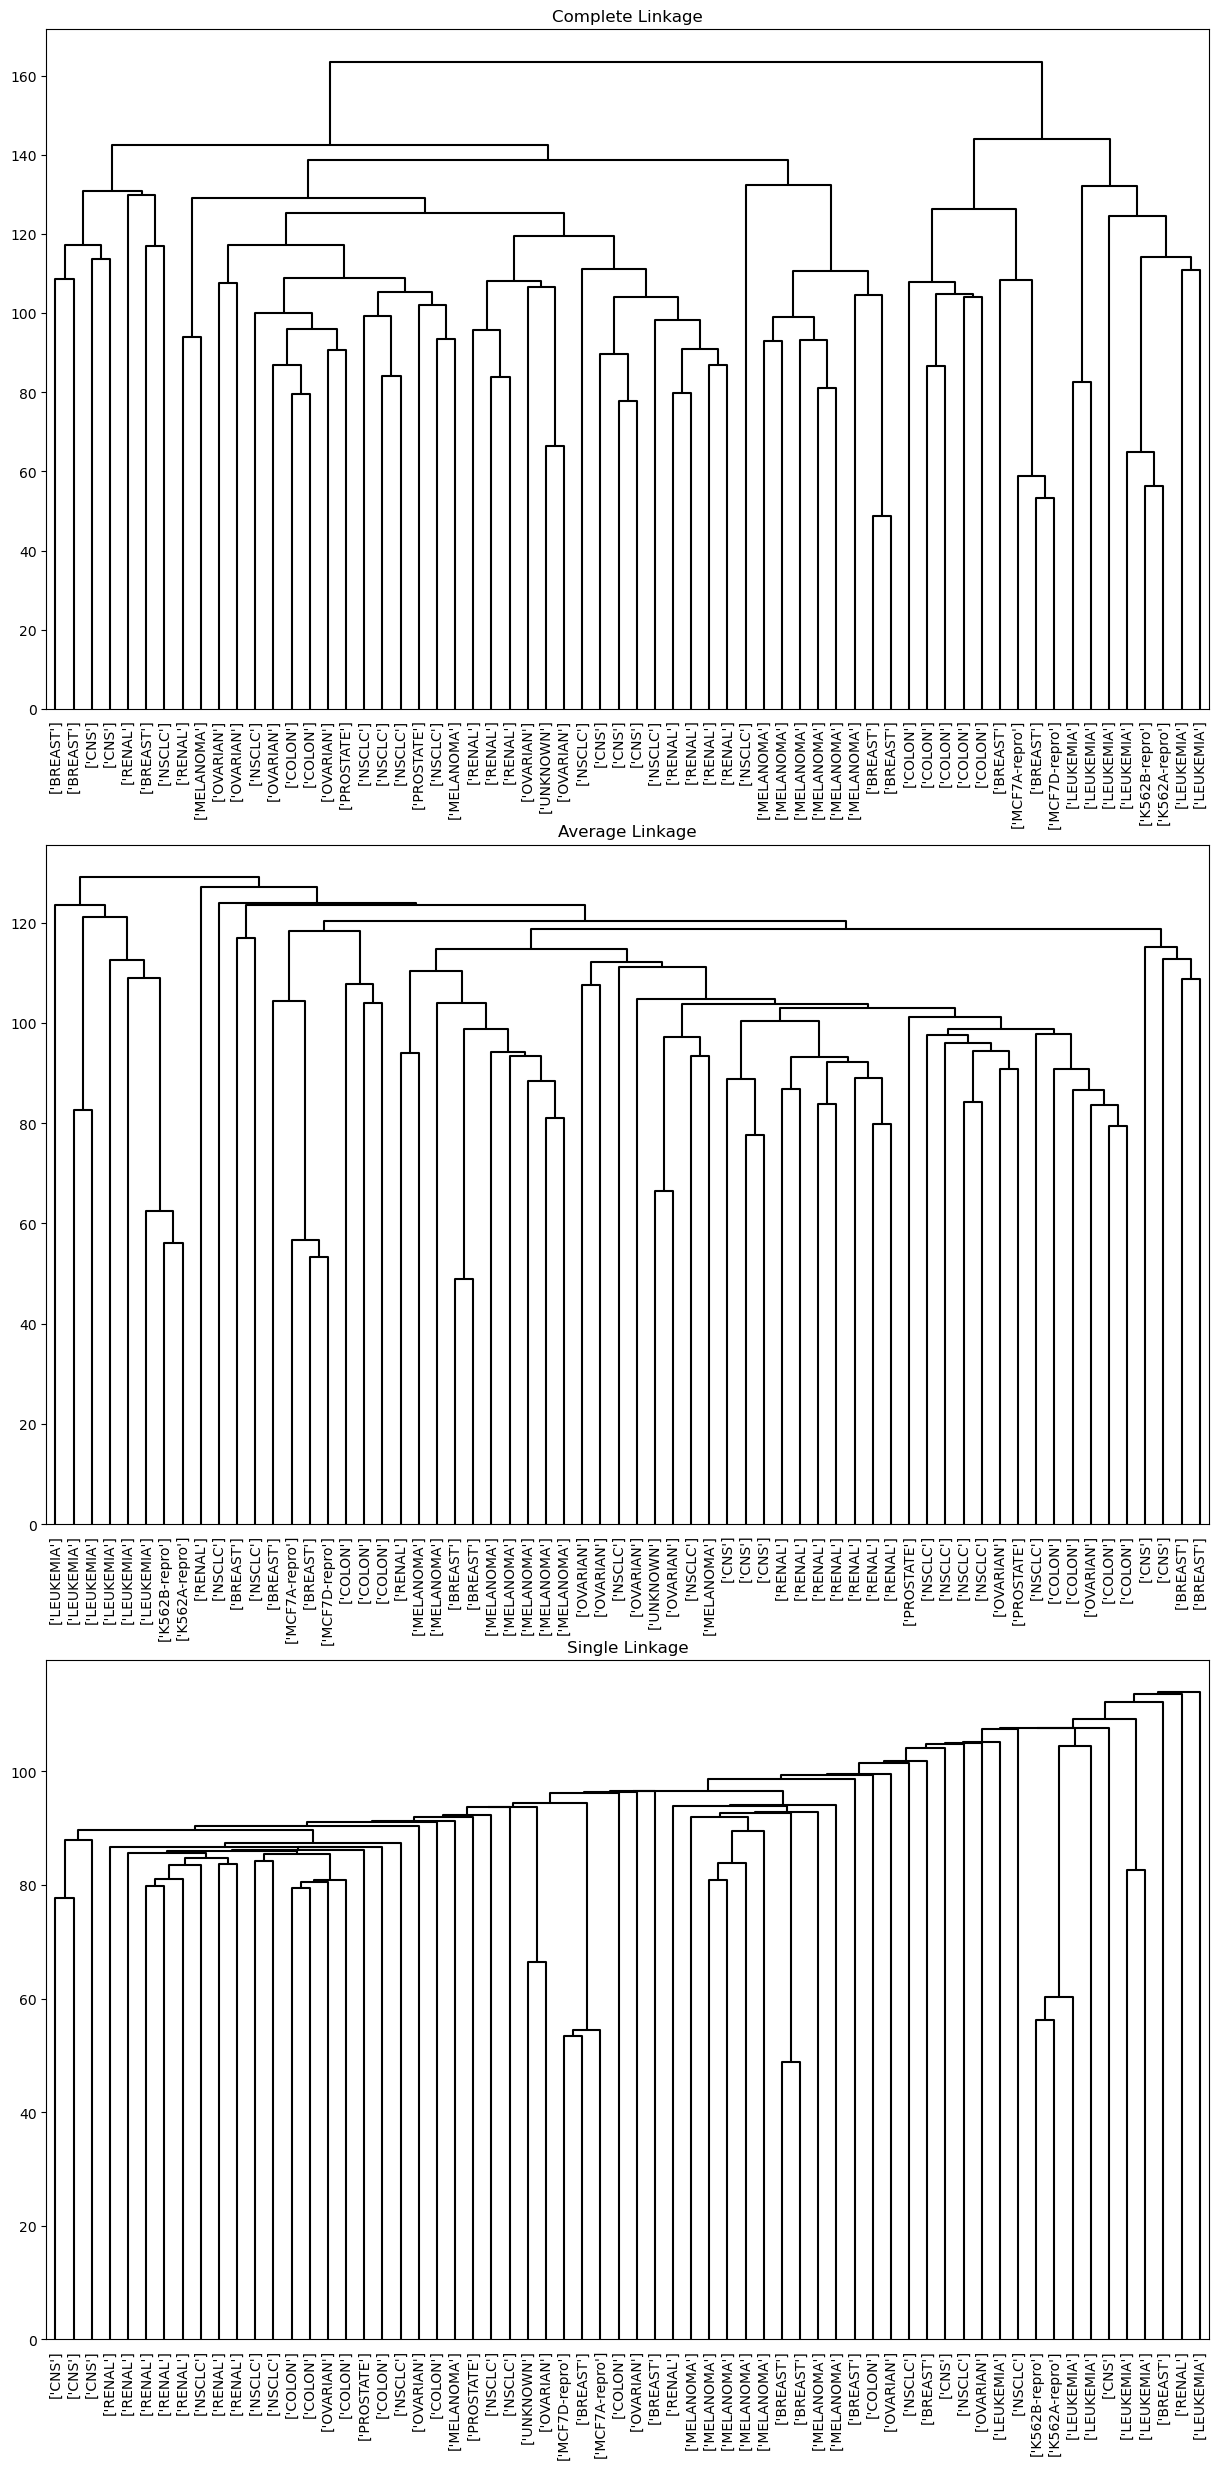

In [105]:
## Let’s plot our results.

fig , axes = plt.subplots(3, 1, figsize =(15,30))
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)

In [96]:
linkage_comp = compute_linkage(hc_comp)
comp_cut = cut_tree(linkage_comp , n_clusters =4).reshape(-1)
pd.crosstab(nci_labs['label'],
pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete,0,1,2,3
label,,,,
BREAST,1,2,0,1
CNS,3,2,0,0
COLON,0,0,1,6
K562A-repro,0,0,0,1
K562B-repro,0,0,0,1
LEUKEMIA,0,0,1,5
MCF7A-repro,0,0,0,1
MELANOMA,1,0,0,0
NSCLC,2,1,1,2


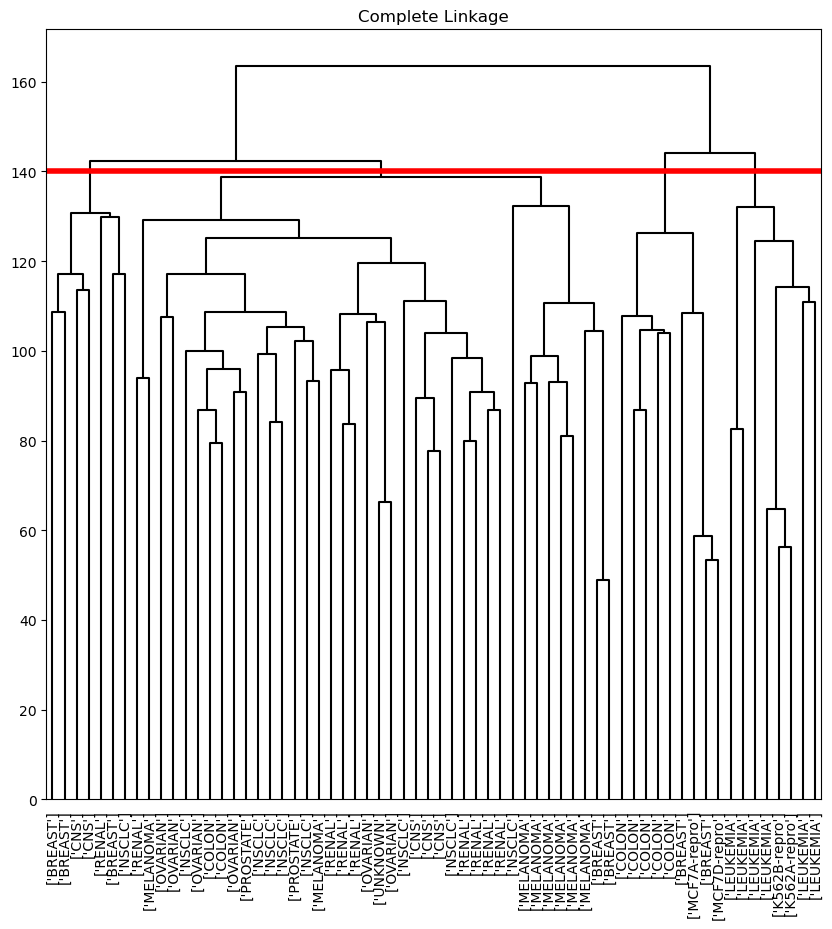

In [106]:
def plot_nci(linkage, ax, cut=140):
    hc = HClust(n_clusters=None, distance_threshold=0, linkage=linkage.lower()).fit(nci_scaled)
    linkage_ = compute_linkage(hc)
    
    # Fix: clean any trailing spaces in dictionary keys
    clean_cargs = {k.strip(): v for k, v in cargs.items()}

    dendrogram(linkage_, ax=ax, labels=np.asarray(nci_labs), 
               leaf_font_size=10, **clean_cargs)
    
    ax.set_title(f'{linkage} Linkage')
    return hc

fig, ax = plt.subplots(figsize=(10, 10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth=4)

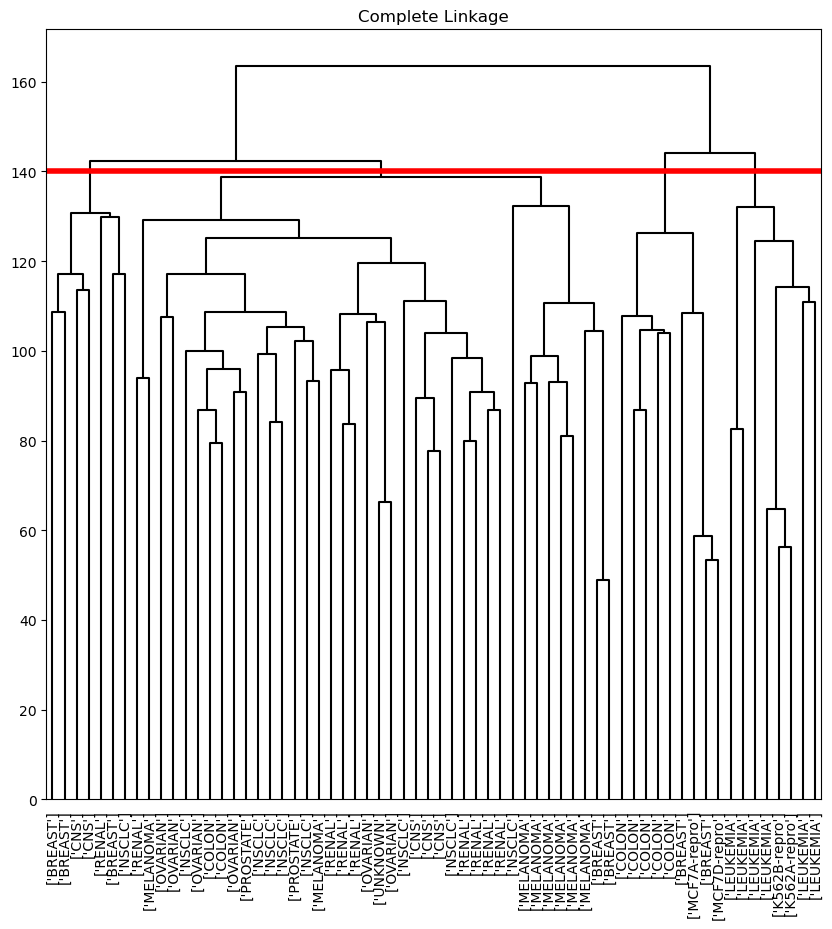

In [107]:
fig , ax = plt.subplots(figsize =(10,10))
plot_nci('Complete', ax, cut=140)
ax.axhline(140, c='r', linewidth =4);

In [108]:
nci_kmeans = KMeans(n_clusters=4,
random_state=0,
n_init =20).fit(nci_scaled)
pd.crosstab(pd.Series(comp_cut , name='HClust'),
pd.Series(nci_kmeans.labels_ , name='K-means'))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means,0,1,3
HClust,,,
0,14,0,0
1,7,0,0
2,6,1,1
3,6,8,7


Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


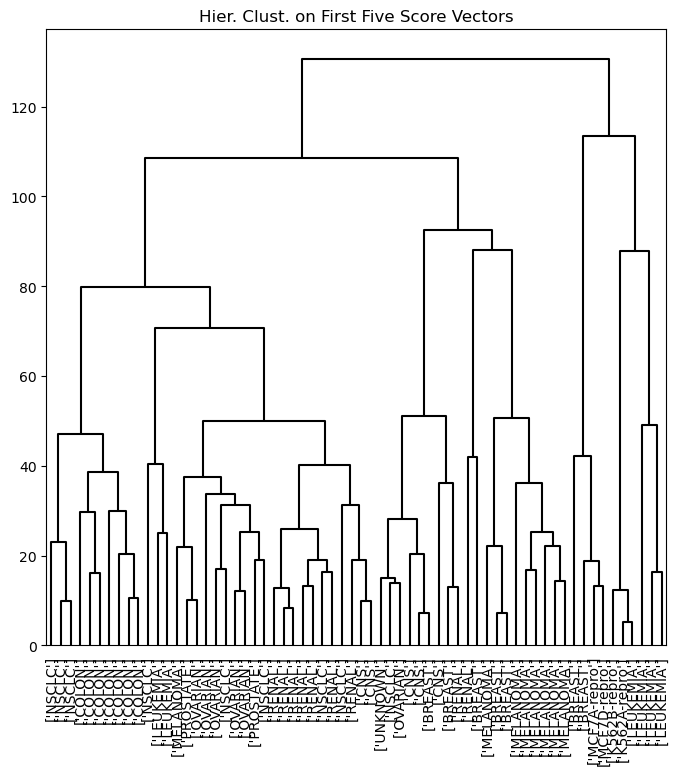

In [109]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Perform hierarchical clustering on the first five PCA components
hc_pca = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
hc_pca.fit(nci_scores[:, :5])

# Reconstruct the linkage matrix (you likely defined compute_linkage yourself)
linkage_pca = compute_linkage(hc_pca)

# Clean up the cargs dictionary to remove trailing spaces in keys
cargs = {k.strip(): v for k, v in cargs.items()}

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(8, 8))
dendrogram(linkage_pca, labels=np.asarray(nci_labs), leaf_font_size=10, ax=ax, **cargs)
ax.set_title("Hier. Clust. on First Five Score Vectors")

# Create cluster labels from the dendrogram
pca_labels = pd.Series(cut_tree(linkage_pca, n_clusters=4).reshape(-1), name='Complete-PCA')

# Crosstab: compare true labels with clusters
pd.crosstab(nci_labs['label'], pca_labels)

## 12.6 Exercises